In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

In [14]:
df = pd.read_csv('co2_emissions (1).csv',sep=';')
df.sample(5)
df.shape

(7385, 12)

In [15]:
def preprocessing1(df,variable):
        df=df.drop_duplicates()
        percentile25 = df[variable].quantile(0.25)
        #print(percentile25)
        percentile75 = df[variable].quantile(0.75)
        #print(percentile75)
        iqr = percentile75-percentile25
        #print(iqr)
        upper_limit = percentile75 + 1.5 * iqr
        #print(upper_limit)
        lower_limit = percentile25 - 1.5 * iqr
        #print(lower_limit)
        #removing
        new_df = df[(df[variable]) < (upper_limit)]
        print(new_df.shape)
        return new_df

In [16]:
df=preprocessing1(df,'co2_emissions')
df=preprocessing1(df,'fuel_consumption_comb(l/100km)')

(6199, 12)
(6122, 12)


In [17]:
df.vehicle_class.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [18]:
le_veh = LabelEncoder()
le_tran = LabelEncoder()
le_fuel = LabelEncoder()
df['vehicle_class']  = le_veh.fit_transform(df['vehicle_class'])
df['transmission']  =le_tran.fit_transform(df['transmission'])
df['fuel_type']  = le_fuel.fit_transform(df['fuel_type'])

In [19]:
Xi = df[['vehicle_class','engine_size','cylinders','transmission','fuel_type','fuel_consumption_comb(l/100km)']]
Y = df['co2_emissions']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(Xi)
X

array([[-1.29767916, -0.83438371, -0.86520395,  0.11161862,  0.82327795,
        -0.88365284],
       [-1.29767916, -0.53180269, -0.86520395,  1.62676099,  0.82327795,
        -0.46150996],
       [-1.29767916, -1.21260997, -0.86520395,  0.86918981,  0.82327795,
        -1.88144511],
       ...,
       [ 1.00698643, -0.83438371, -0.86520395,  0.11161862,  0.82327795,
        -0.19287357],
       [ 1.21650148, -0.83438371, -0.86520395,  0.11161862,  0.82327795,
        -0.34638008],
       [ 1.21650148, -0.83438371, -0.86520395,  0.11161862,  0.82327795,
        -0.03936707]])

In [21]:
def demo_models(Model,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST):
    model = Model
    model.fit(X_TRAIN,Y_TRAIN)
    a=r2_score(Y_TRAIN,model.predict(X_TRAIN))
    b=np.sqrt(mean_squared_error(Y_TRAIN,model.predict(X_TRAIN)))
    c=r2_score(Y_TEST,model.predict(X_TEST))
    d=np.sqrt(mean_squared_error(Y_TEST,model.predict(X_TEST)))
    return(print(f"•The Summary for 👉{Model} is:-\n → For Training data : \n    ‣ r2score    = {'%.4f'%a}\n    ‣ RMSE value = {'%.4f'%b}\n → For Validation data : \n    ‣ r2score    = {'%.4f'%c} \n    ‣ RMSE value = {'%.4f'%d}"))

In [23]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [24]:
demo_models(LinearRegression(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉LinearRegression() is:-
 → For Training data : 
    ‣ r2score    = 0.9101
    ‣ RMSE value = 16.6433
 → For Validation data : 
    ‣ r2score    = 0.8981 
    ‣ RMSE value = 17.6810


In [25]:
demo_models(xgb.XGBRegressor(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9988
    ‣ RMSE value = 1.9492
 → For Validation data : 
    ‣ r2score    = 0.9954 
    ‣ RMSE value = 3.7537


In [26]:
demo_models(xgb.XGBRegressor(),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9988
    ‣ RMSE value = 1.9492
 → For Validation data : 
    ‣ r2score    = 0.9954 
    ‣ RMSE value = 3.7537


In [28]:
demo_models(xgb.XGBRegressor(learning_rate=0.05,max_depth=8,n_estimators=400),X_train, X_test, Y_train, Y_test)

•The Summary for 👉XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is:-
 → For Training data : 
    ‣ r2score    = 0.9989
    ‣ RMSE value = 1.8220
 → For Validation data : 
    ‣ r2score    = 0.9972 
    ‣ RMSE value = 2.9333


In [35]:
model = xgb.XGBRegressor()

In [36]:
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
Xi.columns

Index(['vehicle_class', 'engine_size', 'cylinders', 'transmission',
       'fuel_type', 'fuel_consumption_comb(l/100km)'],
      dtype='object')

In [38]:
for i in range(6):
    print(math.fabs(model.feature_importances_[i] * 100))

0.055742799304425716
0.28196764178574085
0.17141138669103384
0.04428402753546834
28.30905020236969
71.13754749298096


In [56]:
input_data = pd.DataFrame({'vehicle_class':'COMPACT',
                          'engine_size':4.4,'cylinders':8,'transmission':'AM','fuel_type':'Z',
                           'fuel_consumption_comb(l/100km)':14.7},index=[1])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =abs(model.predict(input_data))
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))
#338

The Co2 emmitted from your car is [256.29596] in grams per kilometer.


In [63]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras
from tensorflow.python.keras.utils import generic_utils

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_DL = tf.keras.Sequential()
model_DL.add(Dense(128,kernel_initializer='uniform',input_dim=6,activation='relu'))
model_DL.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model_DL.add(Dense(1,activation='linear')) #Output layer
model_DL.compile(optimizer=opt,
                 loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()])
regressor = model_DL.fit(X_train,Y_train,epochs=1000,verbose=3,validation_data=(X_test,Y_test),use_multiprocessing=True)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

Epoch 555/1000
Epoch 556/1000
Epoch 557/1000
Epoch 558/1000
Epoch 559/1000
Epoch 560/1000
Epoch 561/1000
Epoch 562/1000
Epoch 563/1000
Epoch 564/1000
Epoch 565/1000
Epoch 566/1000
Epoch 567/1000
Epoch 568/1000
Epoch 569/1000
Epoch 570/1000
Epoch 571/1000
Epoch 572/1000
Epoch 573/1000
Epoch 574/1000
Epoch 575/1000
Epoch 576/1000
Epoch 577/1000
Epoch 578/1000
Epoch 579/1000
Epoch 580/1000
Epoch 581/1000
Epoch 582/1000
Epoch 583/1000
Epoch 584/1000
Epoch 585/1000
Epoch 586/1000
Epoch 587/1000
Epoch 588/1000
Epoch 589/1000
Epoch 590/1000
Epoch 591/1000
Epoch 592/1000
Epoch 593/1000
Epoch 594/1000
Epoch 595/1000
Epoch 596/1000
Epoch 597/1000
Epoch 598/1000
Epoch 599/1000
Epoch 600/1000
Epoch 601/1000
Epoch 602/1000
Epoch 603/1000
Epoch 604/1000
Epoch 605/1000
Epoch 606/1000
Epoch 607/1000
Epoch 608/1000
Epoch 609/1000
Epoch 610/1000
Epoch 611/1000
Epoch 612/1000
Epoch 613/1000
Epoch 614/1000
Epoch 615/1000
Epoch 616/1000
Epoch 617/1000
Epoch 618/1000
Epoch 619/1000
Epoch 620/1000
Epoch 621/

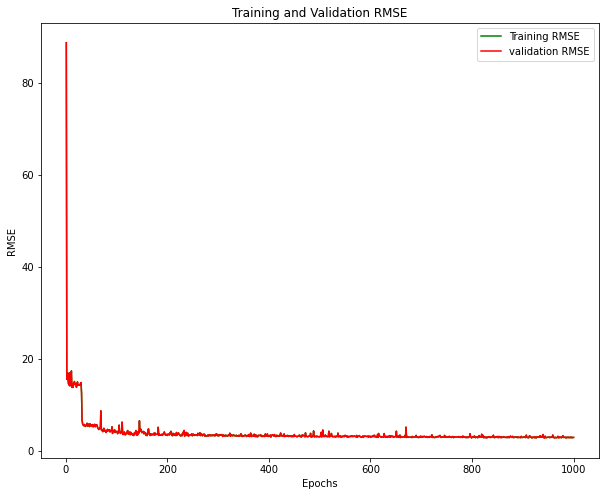

In [64]:
rmse = (regressor.history['root_mean_squared_error'])
val_rmse = regressor.history['root_mean_squared_error']
epochs = range(1,len(rmse)+1)
plt.plot(epochs,rmse,'g',label='Training RMSE')
plt.plot(epochs,val_rmse,'r',label='validation RMSE')
plt.title("Training and Validation RMSE")
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [65]:
model_DL.evaluate(X_train,Y_train) 

154/154 [==============================] - 0s 1ms/step - loss: 11.4739 - root_mean_squared_error: 3.3873


[11.473872184753418, 3.38731050491333]

In [66]:
model_DL.evaluate(X_test,Y_test)

39/39 [==============================] - 0s 1ms/step - loss: 13.6655 - root_mean_squared_error: 3.6967


[13.665483474731445, 3.696685552597046]

In [67]:
input_data = pd.DataFrame({'vehicle_class':'COMPACT',
                          'engine_size':4.4,'cylinders':8,'transmission':'AM','fuel_type':'Z',
                           'fuel_consumption_comb(l/100km)':14.7},index=[1])
input_data['vehicle_class']  = le_veh.fit_transform(input_data['vehicle_class'])
input_data['transmission']  =le_tran.fit_transform(input_data['transmission'])
input_data['fuel_type']  = le_fuel.fit_transform(input_data['fuel_type'])
input_data = scaler.transform(input_data)
pred =abs(model_DL.predict(input_data))
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))
#338

The Co2 emmitted from your car is [[388.29434]] in grams per kilometer.


In [68]:
#import pickle

In [69]:
#filename = 'trained_DL_model2.sav'
#pickle.dump(regressor,open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://228df8f1-cef6-4db3-a804-2b243bb39f05/assets


In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
model_DL.save('DL_2.h5')

In [52]:
import keras_tuner as kt
from tensorflow import keras
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model = model_DL =Sequential()
    model_DL.add(Dense(128,kernel_initializer='uniform',input_dim=6,activation='relu'))
    model_DL.add(Dense(units=hp.Int('units',
                                    min_value=0,
                                    max_value=128,
                                    step=32),kernel_initializer='uniform',activation='relu'))
    model_DL.add(Dense(1,activation='linear')) #Output layer
    model_DL.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                                                              values=[3e-4,0.3,0.5,0.05,0.01,0.1])),
                     loss='mean_squared_error',
                     metrics=['mean_squared_error'])
    return model

In [53]:
tuner = RandomSearch(
    build_model,
    objective=('val_mean_squared_error'),
    max_trials=20,
    executions_per_trial=5,
    directory='nh1',
    project_name=' Emission')

INFO:tensorflow:Reloading Oracle from existing project nh1\ Emission\oracle.json


In [54]:
tuner.search(X_train,Y_train,
             epochs=100,
             validation_data=(X_test,Y_test))

Trial 19 Complete [00h 01m 51s]
val_mean_squared_error: 17.098579025268556

Best val_mean_squared_error So Far: 15.2716495513916
Total elapsed time: 00h 40m 07s
INFO:tensorflow:Oracle triggered exit


In [55]:
tuner.results_summary()

Results summary
Results in nh1\ Emission
Showing 10 best trials
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.01
Score: 15.2716495513916
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.05
Score: 15.782009887695313
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.05
Score: 16.040814208984376
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.05
Score: 17.098579025268556
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.1
Score: 17.946772003173827
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.1
Score: 18.395079040527342
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0003
Score: 31.633198547363282
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.0003
Score: 32.098162460327146
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.0003
Score: 65.04589500427247
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0003
Score: 96.24832153320312
